# Load data

In [ ]:
#pip install biomart


In [ ]:
#pip install gseapy

In [22]:
import pandas as pd
import scanpy as sc
import numpy as np

In [23]:

import gseapy as gp

# Read data

In [38]:
import scanpy as sc

In [39]:
#adata = sc.read("/storage/users/sac43cg/res_Samantha_1/outs/per_sample_outs/time_adata.h5ad")
adata = sc.read("../../data//time_adata_filt_clust_sign_bif.h5ad")

/storage/users/job37yv/shared_conda_envs/scanpy-env3_shared/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [40]:
## make trivial names unique
adata.var_names = adata.var_names.astype(str)
adata.var_names_make_unique()

In [41]:
adata

AnnData object with n_obs × n_vars = 10594 × 650
    obs: 'condition', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pct_cmo', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'leiden', 'leiden_combined', 'louvain', 'louvain_combined', 't', 'seg', 'edge', 't_sd', 'milestones', '43->144_lindev_sel', '43->30_lindev_sel', '82->30_lindev_sel'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'CMO', 'gene_symbol', 'mito', 'ribo', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', '43->144_rss', '43->30_rss', '82->30_rss', 'p_val', 'A', 'fdr', 'st', 'signi', 'clusters'
    uns: '43->144_lindev_sel_colors', '43->30<>144', '43->30<>28', '43->30_lindev_sel_colo

In [42]:
adata.obs.head()

,condition,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,pct_cmo,...,louvain,louvain_combined,t,seg,edge,t_sd,milestones,43->144_lindev_sel,43->30_lindev_sel,82->30_lindev_sel
barcode,,,,,,,,,,,,,,,,,,,,,
AAACCCAGTAGGCTCC-1,CTRL_1,3076,8.031710,15109,9.623112,54.359972,65.514317,73.540856,81.846752,24.628355,...,2,2,0.006304,14,67|13,0.011758,43,putative progenitors,putative progenitors,NaN
AAACCCAGTCGCAACC-1,CTRL_1,4271,8.359837,18912,9.847605,58.422557,66.296003,72.210555,78.996110,34.891727,...,2,2,0.342083,14,159|0,0.043323,43,putative bridge,putative bridge,NaN
AAACCCATCCACAAGT-1,CTRL_1,3517,8.165648,14791,9.601842,48.576595,57.179024,65.667786,75.871868,23.580470,...,5,5,0.087838,14,31|51,0.048672,43,putative bridge,putative bridge,NaN
AAACGCTTCACTACGA-1,CTRL_1,4077,8.313362,18788,9.841027,50.601623,60.215361,68.136395,76.612147,23.367459,...,5,5,0.017375,14,1|61,0.022052,43,putative bridge,putative bridge,NaN
AAACGCTTCAGCCTCT-1,CTRL_1,6263,8.742574,32489,10.388688,47.930883,56.820337,63.782934,71.878976,24.847910,...,6,6,2.114481,8,162|76,0.029623,162,putative bridge,NaN,NaN


## Create dictionary

In [13]:
from biomart import BiomartServer

# Connect to the BioMart server
server = BiomartServer("http://ensembl.org/biomart")

# Select the human genes dataset
dataset = server.datasets['hsapiens_gene_ensembl']

# Query BioMart to get the translation from Ensembl ID to gene symbol
response = dataset.search({
    'attributes': ['ensembl_gene_id', 'external_gene_name'],
})

# Initialize an empty dictionary to store the mapping
ensembl_to_gene_name = {}

# Iterate through the response lines
for line in response.iter_lines():
    # Decode the line and split it into Ensembl ID and gene name
    decoded_line = line.decode('utf-8')
    ensembl_id, gene_name = decoded_line.split('\t')
    
    # Store the mapping in the dictionary
    ensembl_to_gene_name[ensembl_id] = gene_name

# Now, ensembl_to_gene_name is a dictionary with Ensembl IDs as keys and gene names as values.


## Individually define comparison : Define the Comparison and perform the GSEA analysis

### Compare the conditons (testing)

#### old

In [17]:
# set STIM as class 0, CTRL as class 1, to make categorical
adata.obs['condition2'] = pd.Categorical(adata.obs['condition'], categories=["CTRL_1", "TGFb1_GEM_2"], ordered=True)
indices = adata.obs.sort_values(['condition']).index
adata = adata[indices,:]
#adata.obs.condition2

# filter the adata bject for condition that are intended to compare
bdata = adata[adata.obs.condition.isin(["CTRL_1", "TGFb1_GEM_2"])].copy()
#bdata
bdata.obs.condition2


barcode
AAACCCAGTAGGCTCC-1         CTRL_1
GTCCCATGTCACCTTC-1         CTRL_1
GTCCCATGTCATCCCT-1         CTRL_1
GTCCTCACATGACAAA-1         CTRL_1
GTCCTCAGTGATTAGA-1         CTRL_1
                         ...     
CCCTAACCACTCTCGT-1    TGFb1_GEM_2
CCCGAAGTCACGTCCT-1    TGFb1_GEM_2
CCCGAAGCAATAACCC-1    TGFb1_GEM_2
CCATCACAGACTTGTC-1    TGFb1_GEM_2
TTTGACTGTTCCGGTG-1    TGFb1_GEM_2
Name: condition2, Length: 3281, dtype: category
Categories (2, object): ['CTRL_1' < 'TGFb1_GEM_2']

#### new

In [27]:
# Create a new column 'cluster_category' based on the 'leiden' clusters
# Category 1: Clusters 3 and 15
# Category 2: Cluster 6
category_mapping = {'3': 'Category1', '15': 'Category1', '2': 'Category2', '7': 'Category2', '14': 'Category2'}
adata.obs['cluster_category'] = adata.obs['leiden'].map(category_mapping)

# Filter adata to include only the rows with the specified clusters (3, 15, 6)
adata = adata[adata.obs['cluster_category'].notnull()].copy()

# Optionally, you can check the first few rows to confirm
#print(adata.obs.head())
adata.obs.cluster_category

barcode
AAGCGTTAGCCTCGTG-1    Category1
ATCGGATGTTGAGGAC-1    Category2
CATGGATGTGTATCCA-1    Category2
CCACGAGTCCCATAAG-1    Category2
CCGAACGAGAAACACT-1    Category2
                        ...    
TTTACTGTCATTACTC-1    Category2
TTTCACAGTGATATAG-1    Category1
TTTCACATCGATGCAT-1    Category1
TTTCATGTCCCTCTAG-1    Category2
TTTGACTGTTCCGGTG-1    Category1
Name: cluster_category, Length: 2896, dtype: object

In [28]:
# filter the adata bject for condition that are intended to compare
bdata = adata[adata.obs.cluster_category.isin(["Category1", "Category2"])].copy()

In [29]:
expression_df = bdata.to_df().T
#expression_df

In [30]:
expression_df

barcode,AAGCGTTAGCCTCGTG-1,ATCGGATGTTGAGGAC-1,CATGGATGTGTATCCA-1,CCACGAGTCCCATAAG-1,CCGAACGAGAAACACT-1,CCGGACAGTCGACGCT-1,CGAGGCTAGAACTGAT-1,CGCCAGATCTAGAACC-1,CGCCATTAGAACGTGC-1,CGGAATTAGAGCAAGA-1,...,TTGTGGATCTAGCAAC-1,TTGTTCACAGGTCAAG-1,TTGTTTGAGCTCATAC-1,TTTACGTTCAAGGCTT-1,TTTACTGCAGCTACAT-1,TTTACTGTCATTACTC-1,TTTCACAGTGATATAG-1,TTTCACATCGATGCAT-1,TTTCATGTCCCTCTAG-1,TTTGACTGTTCCGGTG-1
gene_symbol,,,,,,,,,,,,,,,,,,,,,
HES4,1.982747,2.213767,0.778701,1.961813,1.183782,1.786503,0.560981,1.390868,2.051576,1.494525,...,1.621794,2.052788,2.241301,0.000000,1.883256,2.679670,1.877891,1.520372,1.049049,0.763774
ISG15,0.760183,1.773268,0.000000,0.798606,0.000000,0.603272,0.918202,0.000000,0.000000,0.622888,...,0.000000,0.000000,1.335489,0.000000,1.050225,1.127936,0.802469,0.000000,0.000000,0.763774
C1QTNF12,0.000000,0.000000,0.000000,0.000000,0.000000,1.461486,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MFAP2,0.000000,0.000000,0.000000,0.798606,0.000000,0.603272,1.180860,1.102679,2.472180,1.003792,...,0.000000,0.000000,1.335489,0.000000,1.730900,0.000000,0.479658,1.520372,1.049049,0.763774
PADI2,1.187030,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.867312,1.331690,0.000000,0.479658,0.000000,2.130579,0.763774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DANT2,0.000000,0.000000,0.778701,0.000000,1.183782,1.461486,0.000000,0.000000,0.856978,0.000000,...,0.000000,0.000000,1.335489,0.000000,1.730900,0.715220,0.479658,2.097755,0.000000,0.000000
KLHL13,0.000000,1.449281,0.000000,0.000000,0.920735,0.603272,0.918202,1.102679,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.331690,0.000000,0.000000,1.520372,0.000000,0.763774
ZNF185,1.347207,0.000000,0.778701,1.236890,0.000000,0.000000,0.560981,0.000000,0.000000,0.000000,...,1.858828,2.052788,1.887631,0.000000,1.730900,0.000000,0.479658,2.097755,0.000000,2.199947


In [31]:
## perfrom GSEA anaylsis for the selected comparisons

res = gp.gsea(data=expression_df,
    gene_sets="Reactome_2022",
    cls=bdata.obs.cluster_category,
    permutation_num=1000,
   # permutation_type='phenotype',
    outdir=None,
    method='s2n', # signal_to_noise
    threads= 16)



   Name                                               Term        ES  \
0  gsea              Signaling By Rho GTPases R-HSA-194315  0.744267   
1  gsea  Signaling By Rho GTPases, Miro GTPases And RHO...  0.744267   
2  gsea         Generic Transcription Pathway R-HSA-212436  0.620223   
3  gsea        RNA Polymerase II Transcription R-HSA-73857  0.607325   
4  gsea        Gene Expression (Transcription) R-HSA-74160   0.59501   

        NES NOM p-val FDR q-val FWER p-val  Tag %  Gene %  \
0  2.503705       0.0       0.0        0.0  19/54   9.55%   
1  2.503705       0.0       0.0        0.0  19/54   9.55%   
2  2.419324       0.0       0.0        0.0  13/61  11.56%   
3  2.362607       0.0       0.0        0.0  13/63  11.56%   
4  2.330371       0.0       0.0        0.0  13/66  11.56%   

                                          Lead_genes  
0  PRC1;BIRC5;CENPF;H2AZ1;DIAPH3;ANLN;KIF2C;KNL1;...  
1  PRC1;BIRC5;CENPF;H2AZ1;DIAPH3;ANLN;KIF2C;KNL1;...  
2  TPX2;CDK1;RRM2;BIRC5;H2AZ1;ATAD2

['Name',
 'Term',
 'ES',
 'NES',
 'NOM p-val',
 'FDR q-val',
 'FWER p-val',
 'Tag %',
 'Gene %',
 'Lead_genes']

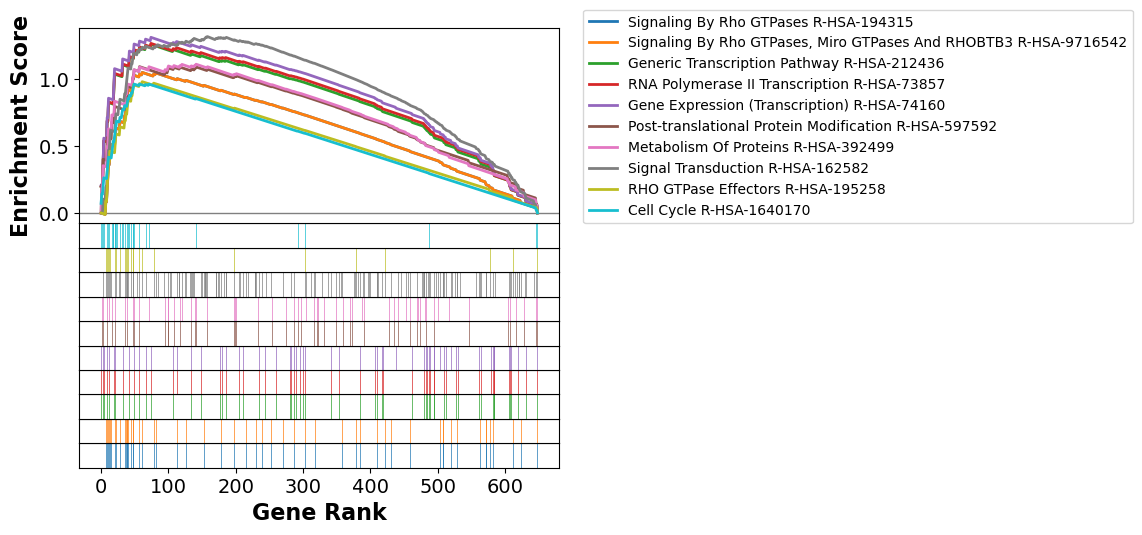

In [32]:





# print head results
res.res2d.head()
print(res.res2d.head())

# Visualize the top pathways
terms = res.res2d.Term
axs = res.plot(terms[:10], show_ranking=False, legend_kws={'loc': (1.05, 0)}, )


# Translate Barcode to Conditons
barcode_to_condition = bdata.obs['cluster_category'].to_dict()
#barcode_to_condition

# Extract barcodes from GSEA results
#barcodes = res.res2d.index.tolist()
barcodes = res.res2d.columns.tolist()
barcodes

# Print terms
#terms







### Compare the Clusters (milestones, leiden)

#### Define the comparisons

In [48]:
# Define a function to label clusters:
# e.g. 5/11 to 2/16 
def label_clusters(cluster):
    if cluster in ["3","15"]:
        return "0"
    elif cluster in ["3","7","13"]:
        return "1"
    else:
        return "NA"  # This label will be used to filter out other clusters

# Create a new categorical column for comparison
adata.obs['compare_clusters'] = adata.obs['leiden'].map(label_clusters)

# Filter the adata object for clusters 2 and 5:
bdata = adata[adata.obs.compare_clusters.isin(["0", "1"])].copy()

# sort indices to define the direction of comparison (could for interpretation of the results :)
sorted_indices = bdata.obs.sort_values(by='compare_clusters').index
bdata = bdata[sorted_indices]

# create a dataframe from bdata and translae ensembl ID to symbol (if not done before!!)
expression_df = bdata.to_df().T


In [49]:
expression_df

barcode,TTTGACTGTTCCGGTG-1,TTCAGGAAGGCTTCCG-1,TTAGGGTGTCCATAGT-1,CCATAAGAGCAGTACG-1,TGTTGAGTCTGTCGCT-1,CCCGGAACACACGTGC-1,CCCGGAAGTTGGGACA-1,TGTGGCGGTCAACATC-1,TGTGCGGGTAGTCCTA-1,CCCTCTCGTACGGCAA-1,...,CACCAAACACGTTCGG-1,CAATTTCAGCATGTTC-1,CAATGACTCTACCAGA-1,CAATGACTCATGGATC-1,CAACAGTGTCTGATCA-1,CAACAACAGTCAAGCG-1,ATTTCTGTCAAAGCCT-1,ATTTCACGTTACCGTA-1,ATTGTTCCACATGACT-1,GTCTAGAGTGTTATCG-1
gene_symbol,,,,,,,,,,,,,,,,,,,,,
HES4,0.763774,2.772856,3.218099,2.487660,2.512232,2.846700,1.934853,1.978462,0.719848,1.211896,...,1.559852,1.620792,1.924299,1.071689,2.208845,1.209099,1.626826,2.509194,1.366907,2.281734
ISG15,0.763774,0.000000,0.000000,0.000000,0.000000,0.906454,0.000000,0.000000,0.000000,0.882075,...,0.000000,0.000000,0.000000,0.000000,1.030032,0.777135,0.000000,0.000000,0.000000,0.000000
C1QTNF12,0.000000,0.000000,0.000000,0.000000,0.000000,0.906454,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MFAP2,0.763774,1.056239,1.814613,0.866737,0.000000,0.000000,0.686712,0.939188,1.134057,0.386601,...,1.559852,0.000000,0.901212,1.071689,0.000000,1.509771,1.315102,0.000000,0.900811,1.162654
PADI2,0.763774,0.000000,0.000000,1.323959,0.000000,0.000000,0.686712,0.000000,0.000000,0.386601,...,0.000000,0.000000,2.541656,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DANT2,0.000000,0.661536,0.000000,0.000000,0.000000,0.000000,1.090023,0.000000,0.000000,0.000000,...,0.000000,1.309610,0.000000,1.071689,0.642158,0.000000,0.859748,0.960719,1.683580,0.000000
KLHL13,0.763774,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.719848,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.683580,0.000000
ZNF185,2.199947,1.056239,1.487451,0.000000,0.757643,0.000000,0.000000,1.414834,1.134057,0.386601,...,2.507512,0.000000,0.901212,0.000000,1.526558,1.209099,1.864121,0.960719,0.900811,0.000000


#### If neccessary translate ID's to gene symbols

In [294]:
# Gen-IDs aus der Datei extrahieren
deg_gene_ids = expression_df.iloc[:, 0]
deg_gene_ids

HES4        0.770266
ISG15       0.000000
C1QTNF12    0.000000
MFAP2       1.200171
PADI2       0.000000
              ...   
DANT2       0.770266
KLHL13      0.000000
ZNF185      1.200171
L1CAM       0.000000
MT-CO2      4.395234
Name: TATTCCACACGCTGAC-1, Length: 580, dtype: float32

In [295]:
# translate ensembl_to_gene_name
mapping_dict = ensembl_to_gene_name

# Assuming expression_df is your DataFrame with Ensembl IDs (feature_id) as the index
# Map the Ensembl IDs in the index to gene symbols
new_index = expression_df.index.map(lambda x: mapping_dict.get(x, x))
new_index

Index(['HES4', 'ISG15', 'C1QTNF12', 'MFAP2', 'PADI2', 'CAMK2N1', 'HSPG2',
       'ID3', 'SFN', 'SESN2',
       ...
       'SHROOM4', 'OPHN1', 'FTX', 'KLHL4', 'BEX2', 'DANT2', 'KLHL13', 'ZNF185',
       'L1CAM', 'MT-CO2'],
      dtype='object', length=580)

In [296]:
# Replace the index of the original DataFrame
expression_df.index = new_index

# Rename the index name to 'gene_name'
expression_df.index.name = 'gene_name'

In [297]:
#expression_df.head()

#### Perform GSEA and visualize

In [298]:
#help(gp.gsea)

In [304]:
## Get the names for the pathway libraries and select one in the gsea function
#names = gp.get_library_name()
#print(names)

In [309]:
#bdata.obs.compare_clusters

In [50]:
# Now you can run GSEA on this filtered data, using the cluster2 label:
# When you are running GSEA, make sure to use the new cluster2 la
res = gp.gsea(data=expression_df,
              #gene_sets="GO_Biological_Process_2023",
              gene_sets="Reactome_2022",
              cls=bdata.obs.compare_clusters, 
              permutation_num=1000,
              outdir=None,
              min_size= 10, 
              max_size = 100,
              method='log2_ratio_of_classes', 
              threads=26)

# print head results
res.res2d.head()
print(res.res2d.head())

   Name                                               Term        ES  \
0  gsea  Signaling By Rho GTPases, Miro GTPases And RHO...  0.683201   
1  gsea              Signaling By Rho GTPases R-HSA-194315  0.683201   
2  gsea                           Cell Cycle R-HSA-1640170   0.85263   
3  gsea                  RHO GTPase Effectors R-HSA-195258  0.804342   
4  gsea                    Cell Cycle, Mitotic R-HSA-69278  0.837626   

        NES NOM p-val FDR q-val FWER p-val  Tag %  Gene %  \
0  2.319467       0.0  0.023281      0.008  17/54  11.09%   
1  2.319467       0.0  0.023281      0.008  17/54  11.09%   
2  2.082327       0.0  0.036008       0.01  25/34  10.94%   
3   2.01259       0.0  0.031196      0.015  15/25  10.94%   
4  2.012339       0.0  0.024957      0.015  22/31  10.94%   

                                          Lead_genes  
0  KIF2C;DIAPH3;KNL1;KIF14;BUB1;CDCA8;CENPE;ANLN;...  
1  KIF2C;DIAPH3;KNL1;KIF14;BUB1;CDCA8;CENPE;ANLN;...  
2  CDK1;KIF2C;GTSE1;TOP2A;HJURP;KNL

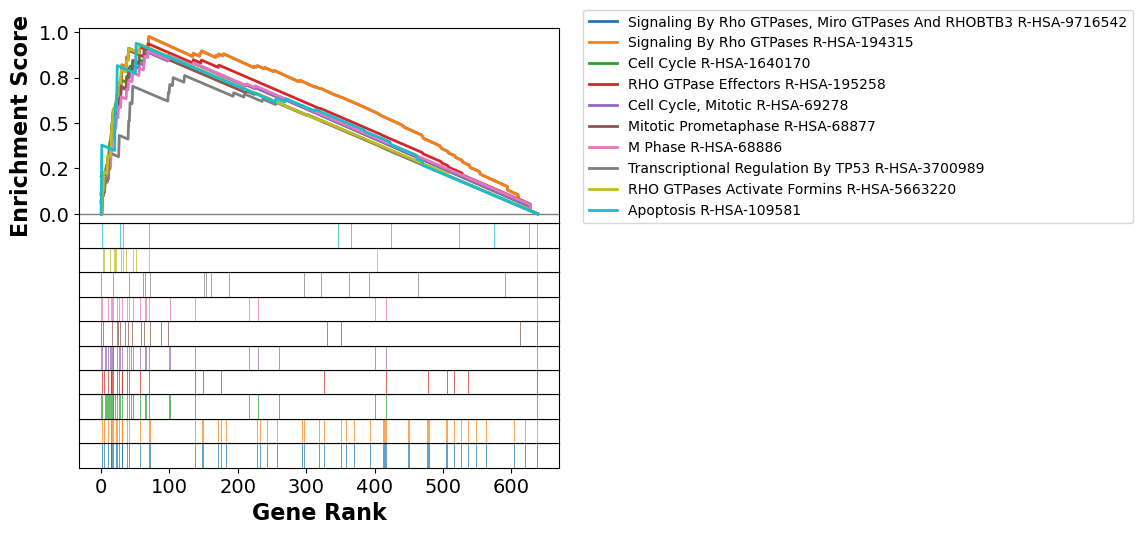

In [51]:
# Visualize the top pathways
terms = res.res2d.Term
axs = res.plot(terms[:10], show_ranking=False, legend_kws={'loc': (1.05, 0)}, )

#### Some barcode annotation: Forgot why :)

In [ ]:
# Translate Barcode to Conditons
barcode_to_condition = adata.obs['condition'].to_dict()
#barcode_to_condition

# Extract barcodes from GSEA results
#barcodes = res.res2d.index.tolist()
barcodes = res.res2d.columns.tolist()
barcodes

# Print terms
#terms

In [ ]:
#help(gp.gsea)

## Print Heatmap

In [ ]:
from gseapy import heatmap
# plotting heatmap
i = 2
genes = res.res2d.Lead_genes[i].split(";")
# Make sure that ``ofname`` is not None, if you want to save your figure to disk


df_heat = res.heatmat.loc[genes]
barcode_to_condition

new_columns = df_heat.columns.map(barcode_to_condition.get)

# Assign the new column names back to the DataFrame
df_heat.columns = new_columns


ax = heatmap(df = df_heat, z_score=0, title=terms[i], figsize=(14,4))

gs_res = res
gs_res.heatmat.loc[genes]


## Plot Bubbleplot

In [166]:
import matplotlib.pyplot as plt

from gseapy import dotplot
# to save your figure, make sure that ``ofname`` is not None
ax = dotplot(gs_res.res2d,
column="FDR q-val",
title='KEGG_2021_Human',
cmap=plt.cm.viridis,
size=5,
figsize=(4,5), cutoff=1)

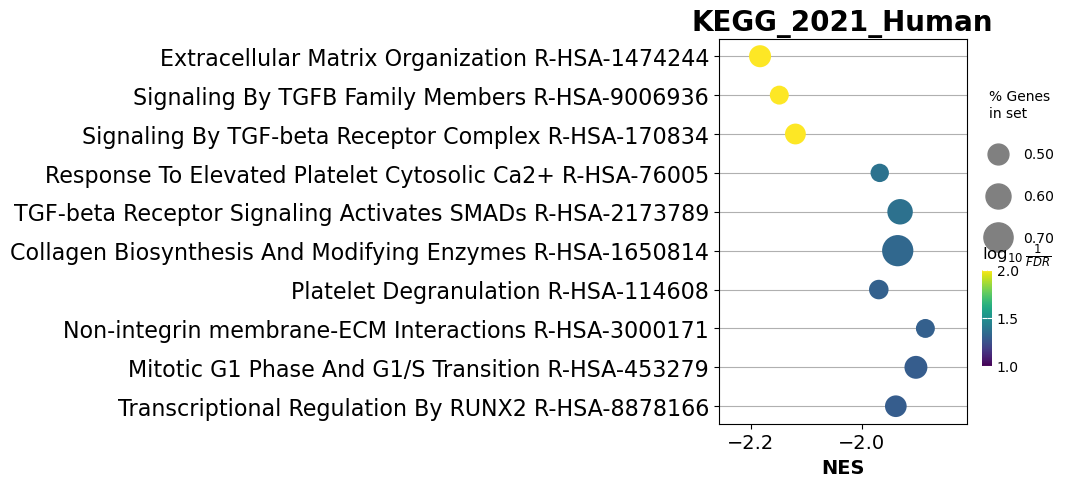

## Plot pathway network

In [168]:
import networkx as nx

In [169]:
res.res2d.head()


,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,gsea,Extracellular Matrix Organization R-HSA-1474244,-0.607517,-2.183252,0.002257,0.005501,0.003,46/87,20.74%,SERPINE1;MMP2;COL1A1;COL5A1;PDGFA;LOX;ADAM19;P...
1,gsea,Signaling By TGFB Family Members R-HSA-9006936,-0.6769,-2.148591,0.0,0.005501,0.005,15/33,8.67%,PMEPA1;SERPINE1;SKIL;ITGAV;BMPR2;SMURF2;ARHGEF...
2,gsea,Signaling By TGF-beta Receptor Complex R-HSA-1...,-0.708324,-2.119574,0.0,0.006112,0.008,13/26,8.67%,PMEPA1;SERPINE1;SKIL;ITGAV;SMURF2;ARHGEF18;SMA...
3,gsea,Collagen Formation R-HSA-1474290,-0.625634,-1.975415,0.002257,0.055464,0.059,22/35,25.57%,COL1A1;COL5A1;LOX;COL22A1;PLOD2;COL7A1;P4HA3;C...
4,gsea,Platelet Degranulation R-HSA-114608,-0.599753,-1.969447,0.0,0.049505,0.065,15/32,16.13%,SERPINE1;PDGFA;PDGFB;TAGLN2;TUBA4A;IGF2;THBS1;...


In [170]:
 nodes, edges = gp.enrichment_map(res.res2d)


In [171]:
nodes.head()


,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes,p_inv,Hits_ratio
node_idx,,,,,,,,,,,,
0,gsea,Non-integrin membrane-ECM Interactions R-HSA-3...,-0.632753,-1.885516,0.006356,0.049963,0.137,10/22,11.40%,PDGFA;PDGFB;ITGAV;THBS1;SDC1;TGFB1;ITGB3;LAMB3...,1.301351,0.454545
1,gsea,Platelet Degranulation R-HSA-114608,-0.599753,-1.969447,0.0,0.049505,0.065,15/32,16.13%,SERPINE1;PDGFA;PDGFB;TAGLN2;TUBA4A;IGF2;THBS1;...,1.305353,0.468750
2,gsea,Collagen Biosynthesis And Modifying Enzymes R-...,-0.68322,-1.935332,0.002227,0.046525,0.089,18/24,25.57%,COL1A1;COL5A1;COL22A1;PLOD2;COL7A1;P4HA3;COL15...,1.332311,0.750000
3,gsea,TGF-beta Receptor Signaling Activates SMADs R-...,-0.690859,-1.931101,0.0,0.042578,0.089,11/18,17.27%,PMEPA1;ITGAV;SMURF2;SMAD7;TGFB1;LTBP3;TGFBR1;F...,1.370813,0.611111
4,gsea,Response To Elevated Platelet Cytosolic Ca2+ R...,-0.586327,-1.967738,0.0,0.041865,0.065,15/34,16.13%,SERPINE1;PDGFA;PDGFB;TAGLN2;TUBA4A;IGF2;THBS1;...,1.378148,0.441176


In [172]:
edges.head()


,src_idx,targ_idx,src_name,targ_name,jaccard_coef,overlap_coef,overlap_genes
0,0,1,Non-integrin membrane-ECM Interactions R-HSA-3...,Platelet Degranulation R-HSA-114608,0.250000,0.5,"PDGFB,ITGB3,THBS1,PDGFA,TGFB1"
1,0,3,Non-integrin membrane-ECM Interactions R-HSA-3...,TGF-beta Receptor Signaling Activates SMADs R-...,0.166667,0.3,"ITGB3,ITGAV,TGFB1"
2,0,4,Non-integrin membrane-ECM Interactions R-HSA-3...,Response To Elevated Platelet Cytosolic Ca2+ R...,0.250000,0.5,"PDGFB,ITGB3,THBS1,PDGFA,TGFB1"
3,0,5,Non-integrin membrane-ECM Interactions R-HSA-3...,Signaling By TGF-beta Receptor Complex R-HSA-1...,0.150000,0.3,"ITGB3,ITGAV,TGFB1"
4,0,6,Non-integrin membrane-ECM Interactions R-HSA-3...,Extracellular Matrix Organization R-HSA-1474244,0.217391,1.0,"PDGFB,ITGA2,ITGB3,THBS1,PDGFA,SDC2,LAMB3,ITGAV..."


In [175]:
# build graph
G = nx.from_pandas_edgelist(edges,
    source='src_idx',
    target='targ_idx',
    edge_attr=['jaccard_coef', 'overlap_coef', 'overlap_genes'])


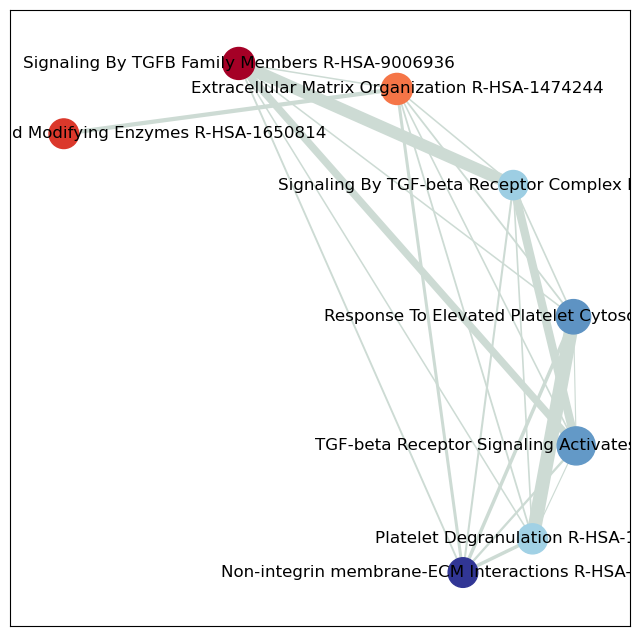

In [176]:
fig, ax = plt.subplots(figsize=(8, 8))
# init node cooridnates
pos=nx.layout.spiral_layout(G)
#node_size = nx.get_node_attributes()
# draw node
nx.draw_networkx_nodes(G,
pos=pos,
cmap=plt.cm.RdYlBu,
node_color=list(nodes.NES),
node_size=list(nodes.Hits_ratio *1000))
# draw node label
nx.draw_networkx_labels(G,
pos=pos,
labels=nodes.Term.to_dict())
# draw edge
edge_weight = nx.get_edge_attributes(G, 'jaccard_coef').values()
nx.draw_networkx_edges(G,
pos=pos,
width=list(map(lambda x: x*10, edge_weight)),
edge_color='#CDDBD4')
plt.show()
